In [1]:
import pandas as pd

In [3]:
# loading the data and creating a dataframe for each dataset
confirmed=pd.read_csv("D:/Agnes backups/Downloads file/Datasets-CDS/time_series_2019-ncov-Confirmed.csv")
deaths=pd.read_csv("D:/Agnes backups/Downloads file/Datasets-CDS/time_series_2019-ncov-Deaths.csv")
recovered=pd.read_csv("D:/Agnes backups/Downloads file/Datasets-CDS/time_series_2019-ncov-Recovered.csv")

In [4]:
confirmed.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0


In [5]:
deaths.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0


In [6]:
recovered.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0


In [7]:
confirmed.shape

(501, 66)

In [8]:
deaths.shape

(501, 66)

In [9]:
recovered.shape

(501, 66)

In [10]:
# No. of countries 
# this shows the number of times each country occurred in the dataset and also the total no. of countries ie length.

confirmed['Country/Region'].value_counts()

US               249
China             33
Canada            12
Australia          9
France             9
                ... 
Ukraine            1
Hungary            1
Liechtenstein      1
Poland             1
The Gambia         1
Name: Country/Region, Length: 183, dtype: int64

In [11]:
# Alternative way to get number of countries

confirmed['Country/Region'].nunique()

183

In [12]:
""" Create a new dataframe that shows the total number of confirmed cases, death cases and recovered cases. """

' Create a new dataframe that shows the total number of confirmed cases, death cases and recovered cases. '

In [13]:
# Aggregate columns and countries
## columns
def agg_columns(df):
    column_names = df.columns[df.columns.get_loc('1/22/20'):]
    agg = df[column_names].sum(axis=1)
    return agg

# countries
def agg_countries(df):
    df=df.groupby('Country/Region').sum()
    return df


In [14]:
# create dataframe for confirmed, death and recovered cases
df=confirmed.iloc[:,:4]
df['confirmed']=agg_columns(confirmed)
df['deaths']=agg_columns(deaths)
df['recovered']=agg_columns(recovered)
df.head()

,Province/State,Country/Region,Lat,Long,confirmed,deaths,recovered
0,NaN,Thailand,15.0000,101.0000,4634.0,23.0,1231.0
1,NaN,Japan,36.0000,138.0000,17650.0,452.0,2981.0
2,NaN,Singapore,1.2833,103.8333,7015.0,6.0,2982.0
3,NaN,Nepal,28.1667,84.2500,61.0,0.0,41.0
4,NaN,Malaysia,2.5000,112.5000,10197.0,33.0,1312.0


In [15]:
# Dropping the columns not needed i.e Lat and Long
df=agg_countries(df).drop(['Lat','Long'], axis=1)
df.sample(n=5)

,confirmed,deaths,recovered
Country/Region,,,
Bosnia and Herzegovina,677.0,3.0,14.0
Portugal,8307.0,52.0,37.0
Cruise Ship,26228.0,189.0,4519.0
Cameroon,182.0,0.0,0.0
Jordan,586.0,0.0,11.0


In [16]:
# finding the top three countries  with confirmed, deaths and recovered individuals
df.nlargest(3,'confirmed')

,confirmed,deaths,recovered
Country/Region,,,
China,3531169.0,119412.0,1787212.0
Italy,497959.0,39435.0,50954.0
Iran,252770.0,14809.0,79929.0


In [17]:
# number of confirmed cases as at 23rd march 2020 (1/23/2020)
df[df['confirmed']>0].shape

(175, 3)

In [18]:
len(df[df['confirmed']>0])+2

177

In [19]:
# country with highest death rate
deaths.nlargest(1,'1/23/20')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
154,Hubei,China,30.9756,112.2707,17,17,24,40,52,76,...,3075,3085,3099,3111,3122,3130,3133,3139,3144,3153.0


In [20]:
# find 
df['recovery_rate']=df['recovered']/df['confirmed']
df['death_rate']=df['deaths']/df['confirmed']
df.nlargest(10,'death_rate')


,confirmed,deaths,recovered,recovery_rate,death_rate
Country/Region,,,,,
Guam,0.0,1.0,0.0,NaN,inf
Puerto Rico,0.0,1.0,0.0,NaN,inf
Sudan,17.0,11.0,0.0,0.000000,0.647059
Guyana,60.0,12.0,0.0,0.000000,0.200000
Gabon,23.0,4.0,0.0,0.000000,0.173913
Guatemala,92.0,8.0,0.0,0.000000,0.086957
San Marino,1682.0,139.0,40.0,0.023781,0.082640
Philippines,2632.0,212.0,114.0,0.043313,0.080547
Italy,497959.0,39435.0,50954.0,0.102326,0.079193


In [21]:
#top 3 countries with the highest recovery rate
df.nlargest(3,'recovery_rate')

,confirmed,deaths,recovered,recovery_rate,death_rate
Country/Region,,,,,
Nepal,61.0,0.0,41.0,0.672131,0.000000
China,3531169.0,119412.0,1787212.0,0.506125,0.033817
Singapore,7015.0,6.0,2982.0,0.425089,0.000855


In [22]:
def unstack(df):
    unstacked = df.drop(['Province/State', 'Lat', 'Long'], axis=1).groupby('Country/Region').sum().unstack()
    return unstacked

confirmed_unpivot = unstack(confirmed)
death_unpivot = unstack(deaths)
recovered_unpivot = unstack(recovered)

# merging the dataframes 
data = pd.concat([confirmed_unpivot, death_unpivot, recovered_unpivot], axis=1)
data.columns = ['confirmed','deaths','recovered']
data = data.reset_index().rename(columns={'level_0':'date'})
data.sample(20)

,date,Country/Region,confirmed,deaths,recovered
10196,3/17/20,Paraguay,9.0,0.0,0.0
4728,2/16/20,Somalia,0.0,0.0,0.0
2374,2/3/20,Uzbekistan,0.0,0.0,0.0
5534,2/21/20,Denmark,0.0,0.0,0.0
10027,3/16/20,San Marino,109.0,7.0,4.0
10514,3/19/20,Iraq,192.0,13.0,43.0
1943,2/1/20,Monaco,0.0,0.0,0.0
10887,3/21/20,Jordan,85.0,0.0,1.0
771,1/26/20,Croatia,0.0,0.0,0.0
471,1/24/20,Maldives,0.0,0.0,0.0


In [23]:
# To get information for Kenya
data[data['Country/Region'] == 'Kenya']

,date,Country/Region,confirmed,deaths,recovered
92,1/22/20,Kenya,0.0,0.0,0.0
275,1/23/20,Kenya,0.0,0.0,0.0
458,1/24/20,Kenya,0.0,0.0,0.0
641,1/25/20,Kenya,0.0,0.0,0.0
824,1/26/20,Kenya,0.0,0.0,0.0
...,...,...,...,...,...
10523,3/19/20,Kenya,7.0,0.0,0.0
10706,3/20/20,Kenya,7.0,0.0,0.0
10889,3/21/20,Kenya,7.0,0.0,0.0
11072,3/22/20,Kenya,15.0,0.0,0.0


In [24]:
data[data['date'] == '3/5/20'] # to get information for 5th march

,date,Country/Region,confirmed,deaths,recovered
7869,3/5/20,Afghanistan,1.0,0.0,0.0
7870,3/5/20,Albania,0.0,0.0,0.0
7871,3/5/20,Algeria,12.0,0.0,0.0
7872,3/5/20,Andorra,1.0,0.0,0.0
7873,3/5/20,Angola,0.0,0.0,0.0
...,...,...,...,...,...
8047,3/5/20,Uzbekistan,0.0,0.0,0.0
8048,3/5/20,Venezuela,0.0,0.0,0.0
8049,3/5/20,Vietnam,16.0,0.0,16.0
8050,3/5/20,Zambia,0.0,0.0,0.0


In [25]:
# Write a function that would allow a user to get the total number of cases 
# (confirmed, deaths or recovered) by giving the input of country and date period they wish.
def stats(country, date):
    if date == "":
        date = max(data['date'])
        
    sample = data[(data['Country/Region']==country) & (data['date'])]
    
   # sample=sample.groupby('Country/Region').sum() 

    return sample

In [26]:
stats("Kenya", '3/5/20')

,date,Country/Region,confirmed,deaths,recovered
92,1/22/20,Kenya,0.0,0.0,0.0
275,1/23/20,Kenya,0.0,0.0,0.0
458,1/24/20,Kenya,0.0,0.0,0.0
641,1/25/20,Kenya,0.0,0.0,0.0
824,1/26/20,Kenya,0.0,0.0,0.0
...,...,...,...,...,...
10523,3/19/20,Kenya,7.0,0.0,0.0
10706,3/20/20,Kenya,7.0,0.0,0.0
10889,3/21/20,Kenya,7.0,0.0,0.0
11072,3/22/20,Kenya,15.0,0.0,0.0


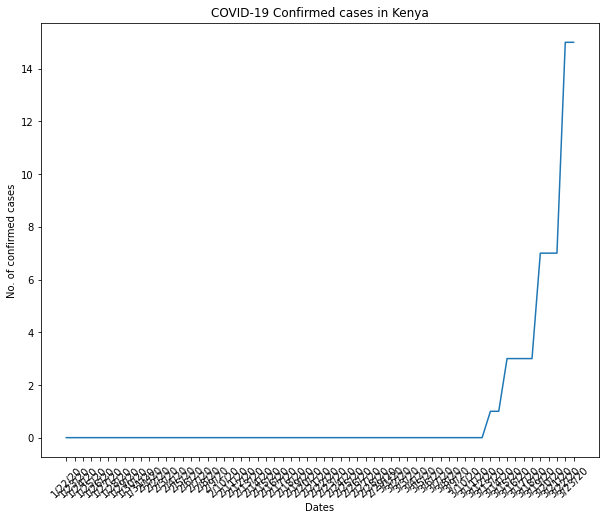

In [32]:
import matplotlib.pyplot as plt

# magic functions
# %matplotlib 

kenya=data[data['Country/Region'] == 'Kenya']

#plot
plt.figure(figsize=(10,8))
plt.plot(kenya['date'], kenya['confirmed'])

# Add chart captions
plt.title("COVID-19 Confirmed cases in Kenya")
plt.ylabel("No. of confirmed cases")
plt.xlabel('Dates')
plt.xticks(rotation=45)


plt.show()

